<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


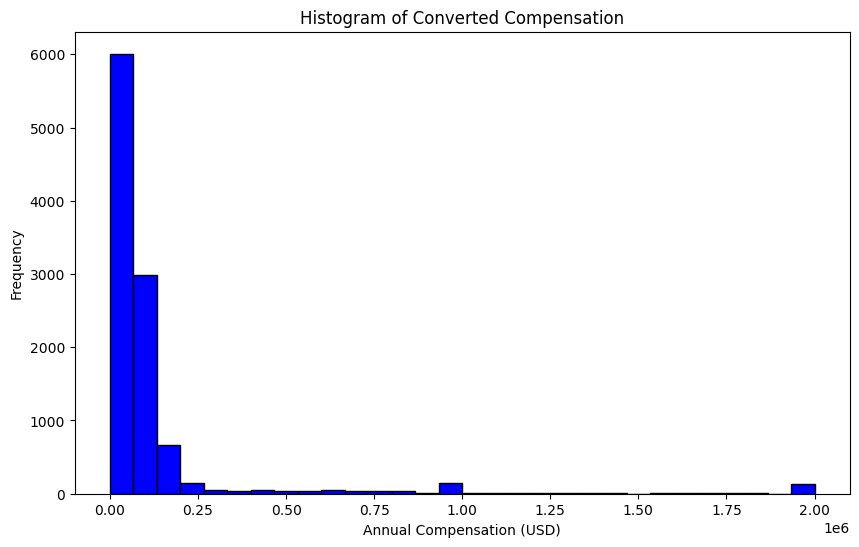

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, color='blue', edgecolor='black')

# Add title and labels
plt.title('Histogram of Converted Compensation')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Frequency')

# Show the plot
plt.show()




Plot the histogram for the column `ConvertedComp`.


In [11]:
plt.show()


What is the median of the column `ConvertedComp`?


In [12]:
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df['ConvertedComp'].median()

print(f'The median of the ConvertedComp column is {median_converted_comp}.')



The median of the ConvertedComp column is 57745.0.


In [24]:
import pandas as pd
# Calculate the median age
median_age = df['Age'].median()

print(f'The median age of survey respondents is {median_age}.')


The median age of survey respondents is 29.0.


How many responders identified themselves only as a **Man**?


In [13]:
# Filter the dataset for respondents who identified as 'Man'
num_men = df[df['Gender'] == 'Man'].shape[0]

print(f'The number of respondents who identified themselves only as a Man is {num_men}.')



The number of respondents who identified themselves only as a Man is 10480.


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# Filter the dataset for respondents who identified as 'Woman'
women_responders = df[df['Gender'] == 'Woman']

# Calculate the median of the 'ConvertedComp' for these respondents
median_converted_comp_women = women_responders['ConvertedComp'].median()

print(f'The median ConvertedComp of respondents who identified themselves only as a Woman is {median_converted_comp_women}.')



The median ConvertedComp of respondents who identified themselves only as a Woman is 57708.0.


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# Calculate the five-number summary
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

print(f"Five-Number Summary for the 'Age' column:")
print(f"Minimum: {min_age}")
print(f"Q1 (25th percentile): {q1_age}")
print(f"Median (50th percentile): {median_age}")
print(f"Q3 (75th percentile): {q3_age}")
print(f"Maximum: {max_age}")


Five-Number Summary for the 'Age' column:
Minimum: 16.0
Q1 (25th percentile): 25.0
Median (50th percentile): 29.0
Q3 (75th percentile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


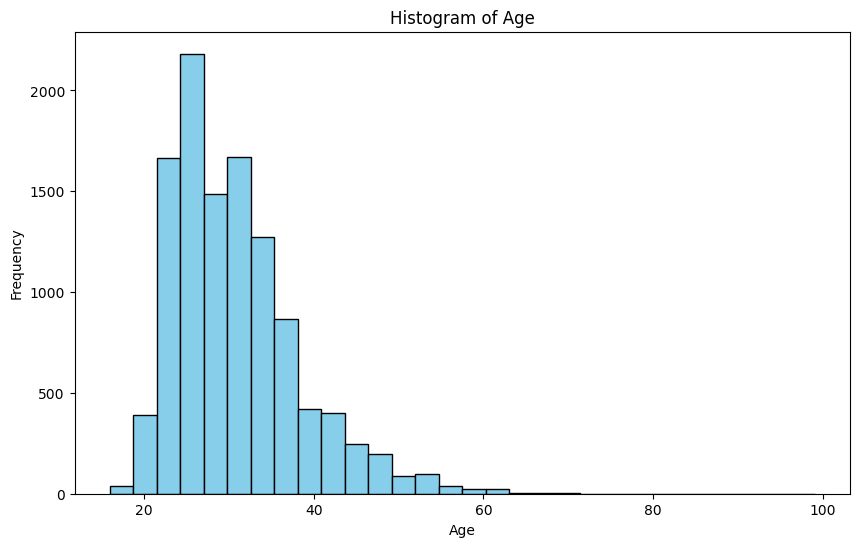

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()



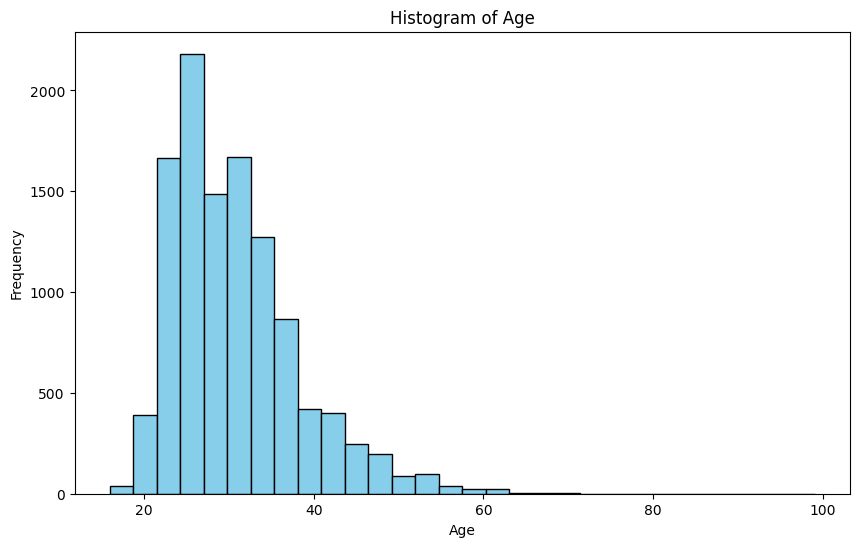

The age group with the highest number of survey respondents is between 24.3 and 27.1 years old.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')

# Find the bin with the highest frequency
max_count_index = n.argmax()
most_frequent_age_range = (bins[max_count_index], bins[max_count_index + 1])

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Print the most frequent age group
print(f'The age group with the highest number of survey respondents is between {most_frequent_age_range[0]:.1f} and {most_frequent_age_range[1]:.1f} years old.')


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


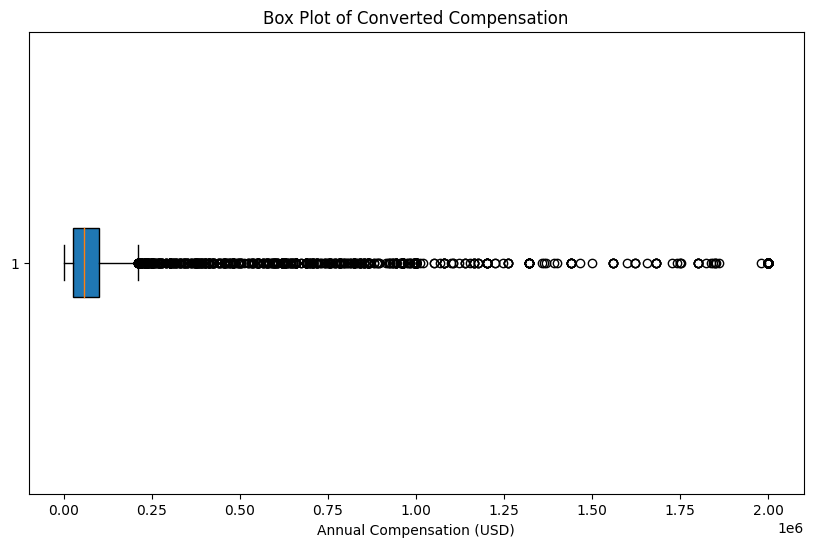

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False, patch_artist=True)

# Add title and labels
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Annual Compensation (USD)')

# Show the plot
plt.show()



In [26]:
import pandas as pd
# Calculate the median of 'ConvertedComp' before removing outliers
median_converted_comp = df['ConvertedComp'].median()

print(f'The median of ConvertedComp before removing outliers is {median_converted_comp}.')


The median of ConvertedComp before removing outliers is 57745.0.


In [28]:
# Identify and count outliers below Q1
outliers_below_q1 = df[df['Age'] < lower_bound]
num_outliers_below_q1 = outliers_below_q1.shape[0]

print(f'The number of outliers below Q1 is {num_outliers_below_q1}.')

The number of outliers below Q1 is 0.


In [27]:
# Calculate the median of 'ConvertedComp' after removing outliers
median_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].median()

print(f'The median of ConvertedComp after removing outliers is {median_converted_comp_no_outliers}.')

The median of ConvertedComp after removing outliers is 52704.0.


In [29]:
# Calculate the mean of 'ConvertedComp' after removing outliers
mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()

print(f'The mean of ConvertedComp after removing outliers is {mean_converted_comp_no_outliers}.')

The mean of ConvertedComp after removing outliers is 59883.20838915799.


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
import pandas as pd
# Calculate the first quartile (25th percentile)
q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (75th percentile)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

print(f'The Interquartile Range (IQR) for the ConvertedComp column is {iqr}.')



The Interquartile Range (IQR) for the ConvertedComp column is 73132.0.


Find out the upper and lower bounds.


In [19]:
import pandas as pd
# Calculate the first quartile (25th percentile)
q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (75th percentile)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'The lower bound for outliers is {lower_bound}.')
print(f'The upper bound for outliers is {upper_bound}.')



The lower bound for outliers is -82830.0.
The upper bound for outliers is 209698.0.


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
import pandas as pd
# Calculate the first quartile (25th percentile)
q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (75th percentile)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print(f'The number of outliers in the ConvertedComp column is {num_outliers}.')



The number of outliers in the ConvertedComp column is 879.


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [21]:
import pandas as pd
# Calculate the first quartile (25th percentile)
q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (75th percentile)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create a new DataFrame by excluding the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the number of rows in the new DataFrame to confirm
print(f'The number of rows in the new DataFrame after removing outliers is {df_no_outliers.shape[0]}.')


The number of rows in the new DataFrame after removing outliers is 9703.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [23]:
import pandas as pd
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Extract the correlation values for 'Age' with all other numerical columns
if 'Age' in correlation_matrix.columns:
    age_correlation = correlation_matrix['Age']
    print('Correlation of Age with all other numerical columns:')
    print(age_correlation)
else:
    print("The column 'Age' is not in the list of numeric columns.")




Correlation of Age with all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [30]:
import pandas as pd
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Extract the correlation values for 'Age' with all other numerical columns
age_correlation = correlation_matrix['Age']

# Find columns with negative correlation with 'Age'
negative_correlation = age_correlation[age_correlation < 0]

print('Columns with a negative correlation with Age:')
print(negative_correlation)


Columns with a negative correlation with Age:
CodeRevHrs   -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
